In [ ]:
import matplotlib.pyplot as plt     # For plotting graphs
import numpy as np                  # For mathematical calculations
import gymnasium as gym             # For creating and managing environments
from stable_baselines3 import PPO    # For implementing the PPO RL algorithm
from IPython.display import clear_output    # For clearing output in visualizations
from gymnasium.wrappers import TimeLimit    # For setting a time limit on episodes
from stable_baselines3.common.vec_env import VecNormalize, DummyVecEnv  # For vectorized environments

In [93]:
env = gym.make('CartPole-v1',render_mode="rgb_array")  # Create the environment with the choosen game where the agent would be operating
env = TimeLimit(env, max_episode_steps=800) # imposes a limit on the number of stpes that can be taken in an episode

env = DummyVecEnv([lambda: env])  # helps train the model on many instance of the env by running multiple envs in parallel
env = VecNormalize(env, norm_obs=True, norm_reward=False)  # VecNormalize helps normalize the rewards & observations so that we get a stable model

model = PPO("MlpPolicy", env, learning_rate=0.005, gamma=0.999, n_steps=2048, verbose=1, seed=42)
# Create the RL agent using PPO algo in the "env" enviorment it uses a Multi layered perceptron (mlp) policy (a type of NN policy)
model.learn(total_timesteps=50000)  # Train the agent

reset_output = env.reset()  # reinitializes the environment to its starting conditions
print("Reset Output:", reset_output) 

# Different envs in gyms return different structure of outputs upon calling reset, print the output & slice it
obs = reset_output[0]  # obs => observation is initial state of the agent

Using cpu device
-----------------------------
| time/              |      |
|    fps             | 1389 |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 2048 |
-----------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 1000       |
|    iterations           | 2          |
|    time_elapsed         | 4          |
|    total_timesteps      | 4096       |
| train/                  |            |
|    approx_kl            | 0.01710736 |
|    clip_fraction        | 0.316      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.678     |
|    explained_variance   | -0.0369    |
|    learning_rate        | 0.005      |
|    loss                 | 5.19       |
|    n_updates            | 10         |
|    policy_gradient_loss | -0.0266    |
|    value_loss           | 13.8       |
----------------------------------------
-----------------------------------

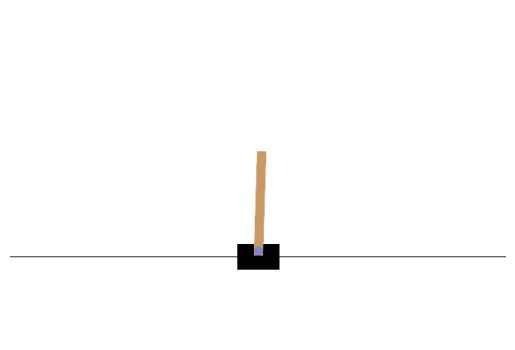

Mean Reward over 100 episodes: 480.3999938964844
list of ep rewards: [500.0, 500.0, 402.0, 500.0, 500.0]


In [94]:
episode_rewards = []    # stores reward recived in each ep, measure performance over time
step_rewards = []

for _ in range(5):  # checking over 5 episodes
    obs = env.reset()  # Reset environment for a new episode
    total_reward = 0
    reward_len = []
    done = False

    while not done:  
        action = model.predict(obs)[0]  # Get action from model
        obs, reward, done, info = env.step(action)  # Step in the environment
        total_reward += reward  # Accumulate reward

        plt.imshow(env.render(mode="rgb_array"))
        plt.axis('off')
        clear_output(wait=True)
        plt.show()
        step_rewards.append(reward)

    episode_rewards.append(total_reward[0])  # Store total reward for this episode
    

mean_reward = np.mean(episode_rewards)  # Calculate mean reward
print(f"Mean Reward over 100 episodes: {mean_reward}") 
print(f"list of ep rewards: {episode_rewards}") 

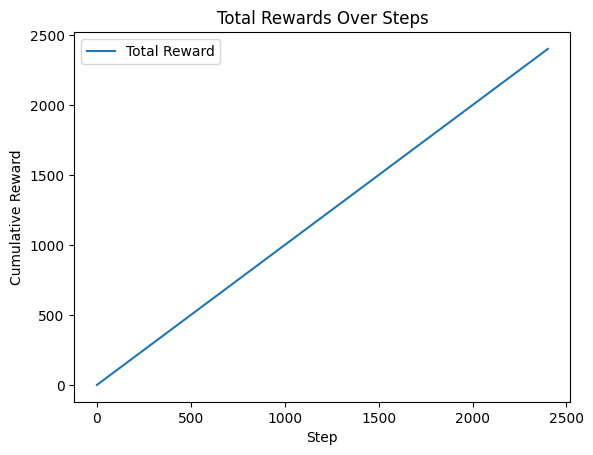

In [95]:
# Plotting total rewards per episode
plt.plot(np.cumsum(step_rewards), label='Total Reward')      # calculates cumulative sum of reward over time. 

plt.title('Total Rewards Over Steps')
plt.xlabel('Step'); plt.ylabel('Cumulative Reward')

plt.legend() # it is an element that labels different lines, points or bar
plt.show()

# model.save("ppo_cartpole")    # Save the trained model

In [96]:
def evaluate_agent(model, env, num_eval_episodes=10):
    total_rewards = []
    
    for _ in range(num_eval_episodes):
        obs = env.reset()  # Reset env at start of each ep 
        done = False        # later indicate wheather ep has ended
        episode_reward = 0  # cumulative reward for an ep
        
        while not done:     # while the ep is not finished
            action= model.predict(obs)[0]     
            obs, reward, done, info = env.step(action)
            episode_reward += reward
            
        total_rewards.append(episode_reward)
    
    average_reward = np.mean(total_rewards)
    std_reward = np.std(total_rewards)
    
    return average_reward, std_reward

# Run evaluations multiple times and store results to confirm stability of the model
num_runs = 10 
all_avg_rewards = []
all_std_rewards = []

for i in range(num_runs):
    avg_reward, std_reward = evaluate_agent(model, env, num_eval_episodes=10)
    all_avg_rewards.append(avg_reward)
    all_std_rewards.append(std_reward)
    print(f"Run {i+ 1}: Average reward: {avg_reward}, standard deviation: {std_reward}")

# Overall average and variance across all runs
print(f"Overall Average Reward: {np.mean(all_avg_rewards)}")
print(f"Overall standard deviation in Reward: {np.mean(all_std_rewards)}")

Run 1: Average reward: 459.6000061035156, standard deviation: 37.51053237915039
Run 2: Average reward: 480.70001220703125, standard deviation: 28.25615119934082
Run 3: Average reward: 437.5, standard deviation: 31.560258865356445
Run 4: Average reward: 427.29998779296875, standard deviation: 28.199466705322266
Run 5: Average reward: 376.79998779296875, standard deviation: 43.76253890991211
Run 6: Average reward: 383.1000061035156, standard deviation: 26.4516544342041
Run 7: Average reward: 352.0, standard deviation: 30.209270477294922
Run 8: Average reward: 351.3999938964844, standard deviation: 25.531156539916992
Run 9: Average reward: 327.0, standard deviation: 22.90851402282715
Run 10: Average reward: 336.3999938964844, standard deviation: 26.777603149414062
Overall Average Reward: 393.17999267578125
Overall standard deviation in Reward: 30.116718292236328
